In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("predModel.csv")
X = data.iloc[:, :6]
y = data.iloc[:, 6:13]

In [3]:
data.columns[1]

'temp1'

In [4]:
X.head()

,volt,temp1,temp2,vibration,speed,lubricant
0,516,57.595105,64.149477,710,51,11
1,400,69.092409,66.165385,460,45,11
2,474,54.553645,56.986961,320,25,9
3,521,42.940973,45.590049,647,52,13
4,499,44.561773,37.671228,387,47,5


In [5]:
y.head()

,power failure,temp1 failure,temp2 failure,extreme vibration,speed error,lubricant required,days left 0
0,0,0,0,1,0,0,12
1,0,0,0,0,0,1,22
2,0,0,0,0,1,0,27
3,0,0,0,1,0,0,8
4,0,0,0,0,0,0,-1


In [6]:
data.describe()

,volt,temp1,temp2,vibration,speed,lubricant,power failure,temp1 failure,temp2 failure,extreme vibration,speed error,lubricant required,days left 0,0,21
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,0.0,0.0
mean,450.385954,67.398899,49.943670,599.381553,38.819928,7.094838,0.145658,0.092037,0.069228,0.436575,0.072229,0.113445,16.107243,NaN,NaN
std,45.897403,15.738516,11.574997,170.997786,11.906294,4.289155,0.352799,0.289107,0.253866,0.496011,0.258892,0.317168,7.629589,NaN,NaN
min,370.000000,40.007388,30.006303,300.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,NaN,NaN
25%,411.000000,53.849895,39.852530,450.000000,28.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,NaN,NaN
50%,452.000000,67.073596,49.994353,600.000000,39.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,NaN,NaN
75%,490.000000,80.721647,59.999160,745.000000,49.000000,11.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,21.000000,NaN,NaN
max,529.000000,94.969512,69.990078,899.000000,59.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,NaN,NaN


In [7]:
def plot_graph(x,y,x_label,y_label):
    plt.figure(figsize=(10, 6))
    # Plot the data as a scatter plot
    plt.scatter(x, y, color='blue', marker='o', label='Data Points')
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(x_label+' X '+y_label)
    # Add gridlines
    plt.grid(True)
    # Add a trendline (linear regression)
    coefficients = np.polyfit(x, y, 1)
    trendline = np.poly1d(coefficients)
    plt.plot(x, trendline(x), color='red', linestyle='--', label='Trendline')
    # Add a colorbar
    plt.colorbar()
    # Add legend
    plt.legend()
    # Show plot
    plt.show()


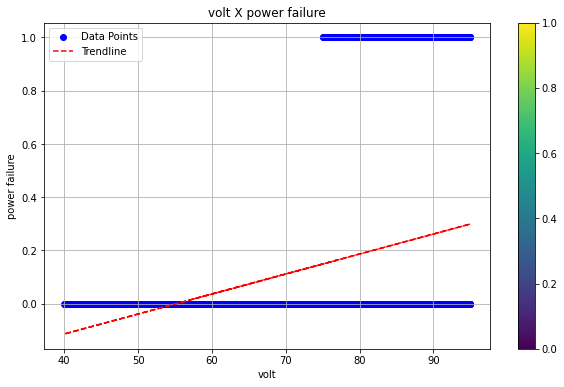

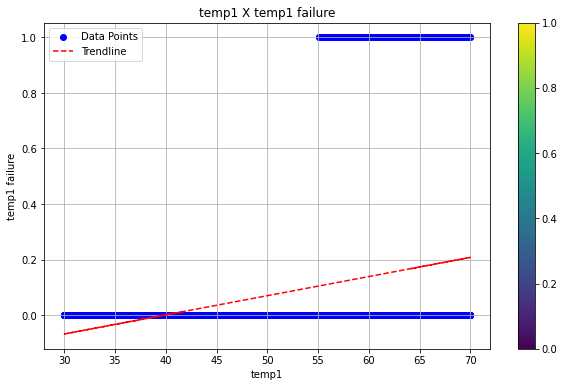

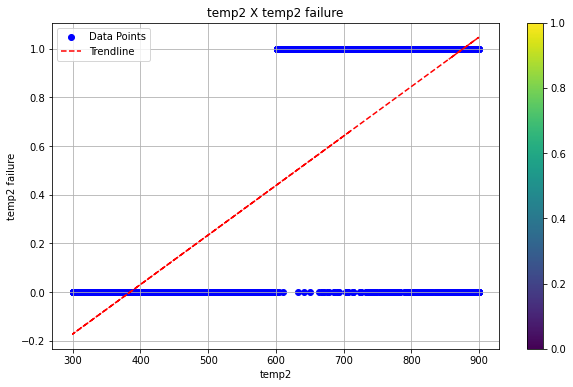

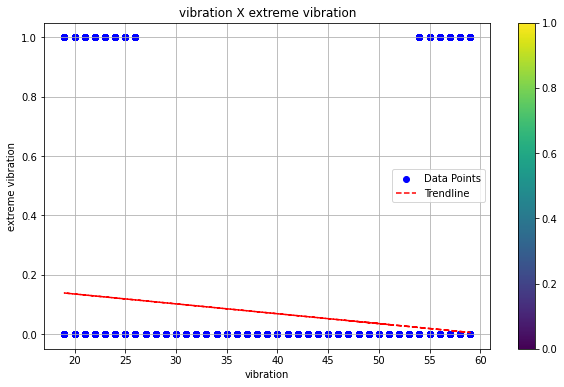

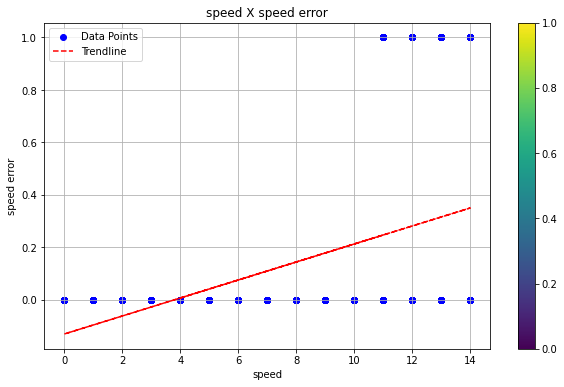

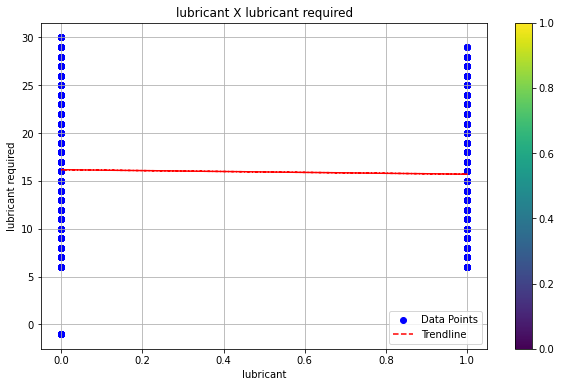

In [8]:
for i in range(1,7):
    plot_graph(np.array(data.iloc[:,i]),np.array(data.iloc[:,6+i]),data.columns[i-1],data.columns[i+5])

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(6,)),
    tf.keras.layers.Dropout(0.2),  # Adding dropout with dropout rate of 0.2
    tf.keras.layers.Dense(10, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),  # Adding dropout with dropout rate of 0.2
    tf.keras.layers.Dense(7, activation='softmax')  # Output layer with sigmoid activation for binary classification
])

In [10]:
# Compile the model
model.compile(optimizer='Adam',
              loss='MAE',  # Binary cross-entropy loss for binary classification
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
100/100 [==============================] - 5s 5ms/step - loss: 2.6448 - accuracy: 0.0222 - val_loss: 2.5330 - val_accuracy: 0.0000e+00
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 2.5368 - accuracy: 0.4103 - val_loss: 2.4227 - val_accuracy: 0.9200
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 2.4373 - accuracy: 0.9237 - val_loss: 2.3477 - val_accuracy: 0.9200
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 2.3896 - accuracy: 0.9309 - val_loss: 2.3203 - val_accuracy: 0.9200
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 2.3693 - accuracy: 0.9309 - val_loss: 2.3070 - val_accuracy: 0.9200
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 2.3589 - accuracy: 0.9309 - val_loss: 2.3002 - val_accuracy: 0.9200
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 2.3532 - accuracy: 0.9309 - val_loss: 2.2965 - val_accuracy: 0.9200
Ep

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

32/32 [==============================] - 0s 2ms/step - loss: 2.3257 - accuracy: 0.9310
Test Accuracy: 0.9309999942779541


In [12]:
# Save the trained model
model.save("industrial_machine_model.h5")

In [13]:
model = tf.keras.models.load_model("industrial_machine_model.h5")  # Replace "your_model.h5" with the path to your trained model file

# Define custom input data
custom_input = np.array([[469, 84.61350024335653, 36.537670713369074, 668, 24, 11]])  # Replace this with your custom input data

# Make predictions with the custom input
predictions = model.predict(custom_input)

# Print the predictions
print("Predictions:", predictions)

1/1 [==============================] - 0s 200ms/step
Predictions: [[1.4797783e-06 5.4370994e-06 4.6468294e-06 4.0655581e-05 1.1527234e-05
  1.4514592e-05 9.9992180e-01]]


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("predModel.csv")  # Replace "your_dataset.csv" with the path to your dataset file

# Separate features (inputs) and labels (outputs)
X = df[['volt', 'temp1', 'temp2', 'vibration', 'speed', 'lubricant']]
y = df[['power failure', 'temp1 failure', 'temp2 failure', 'extreme vibration', 'speed error', 'lubricant required', 'days left 0']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier
k = 3  # You can adjust the value of k as needed
knn = KNeighborsClassifier(n_neighbors=k)

# Create a multi-output classifier
multi_output_classifier = MultiOutputClassifier(knn, n_jobs=-1)

# Train the classifier
multi_output_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = multi_output_classifier.predict(X_test)

# Calculate accuracy for each output separately
accuracies = []
for i in range(len(y.columns)):
    accuracy = (y_test.iloc[:, i] == y_pred[:, i]).mean()
    accuracies.append(accuracy)

print("Accuracy for each output:")
for i, column in enumerate(y.columns):
    print(f"{column}: {accuracies[i]}")
print(sum(accuracies)/7)

Accuracy for each output:
power failure: 0.94
temp1 failure: 0.941
temp2 failure: 0.95
extreme vibration: 0.953
speed error: 0.919
lubricant required: 0.878
days left 0: 0.39
0.8529999999999999


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("predModel.csv")  # Replace "predModel.csv" with the path to your dataset file

# Split the dataset into features (inputs) and labels (outputs)
X = data[['volt', 'temp1', 'temp2', 'vibration', 'speed', 'lubricant']]
y = data[['power failure', 'temp1 failure', 'temp2 failure', 'extreme vibration', 'speed error', 'lubricant required', 'days left 0']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Naive Bayes models for each output column
models = {}
for column in y.columns:
    model = GaussianNB()
    model.fit(X_train, y_train[column])
    models[column] = model

# Make predictions on the test set for each output column
y_preds = {}
for column, model in models.items():
    y_pred = model.predict(X_test)
    y_preds[column] = y_pred

# Evaluate the performance of each model
accuracies = {}
for column in y.columns:
    accuracy = accuracy_score(y_test[column], y_preds[column])
    accuracies[column] = accuracy
    print(f"Accuracy for {column}: {accuracy}")
print(sum(accuracies.values())/7)

Accuracy for power failure: 0.844
Accuracy for temp1 failure: 0.944
Accuracy for temp2 failure: 0.96
Accuracy for extreme vibration: 0.877
Accuracy for speed error: 0.925
Accuracy for lubricant required: 0.948
Accuracy for days left 0: 0.2
0.814


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("predModel.csv")

# Split the dataset into features (inputs) and labels (outputs)
X = data[['volt', 'temp1', 'temp2', 'vibration', 'speed', 'lubricant']]
y_columns = ['power failure', 'temp1 failure', 'temp2 failure', 'extreme vibration', 'speed error', 'lubricant required', 'days left 0']

# Initialize dictionary to store models
models = {}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data[y_columns], test_size=0.2, random_state=42)

# Train a logistic regression model for each output column
for col in y_columns:
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train[col])
    models[col] = model

# Evaluate each model and print accuracy
sum1 = 0
for col, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test[col], y_pred)
    sum1+=accuracy
    print(f"Accuracy for {col}: {accuracy}")
print(sum1/7)

Accuracy for power failure: 0.844
Accuracy for temp1 failure: 0.931
Accuracy for temp2 failure: 0.935
Accuracy for extreme vibration: 0.872
Accuracy for speed error: 0.925
Accuracy for lubricant required: 0.933
Accuracy for days left 0: 0.14
0.797142857142857


c:\users\hpone\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("predModel.csv")

# Split the dataset into features (inputs) and labels (outputs)
X = data[['volt', 'temp1', 'temp2', 'vibration', 'speed', 'lubricant']]
y_columns = ['power failure', 'temp1 failure', 'temp2 failure', 'extreme vibration', 'speed error', 'lubricant required', 'days left 0']

# Initialize dictionary to store models
models = {}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, data[y_columns], test_size=0.2, random_state=42)

# Train an SVM model for each output column
for col in y_columns:
    model = SVC(kernel='linear')
    model.fit(X_train, y_train[col])
    models[col] = model




Accuracy for power failure: 0.844
Accuracy for temp1 failure: 0.932
Accuracy for temp2 failure: 0.94
Accuracy for extreme vibration: 0.907
Accuracy for speed error: 0.922
Accuracy for lubricant required: 0.938
Accuracy for days left 0: 0.166


In [33]:
# Evaluate each model and print accuracy
sum1 = 0
for col, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test[col], y_pred)
    sum1 += accuracy
    print(f"Accuracy for {col}: {accuracy}")
print(sum1/7)

Accuracy for power failure: 0.844
Accuracy for temp1 failure: 0.932
Accuracy for temp2 failure: 0.94
Accuracy for extreme vibration: 0.907
Accuracy for speed error: 0.922
Accuracy for lubricant required: 0.938
Accuracy for days left 0: 0.166
0.807


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("predModel.csv")

# Split the dataset into features (inputs) and labels (outputs)
X = data[['volt', 'temp1', 'temp2', 'vibration', 'speed', 'lubricant']]
y = data[['power failure', 'temp1 failure', 'temp2 failure', 'extreme vibration', 'speed error', 'lubricant required', 'days left 0']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

from sklearn.metrics import hamming_loss

# Calculate Hamming loss manually
hamming_loss_value = 1 - (y_test == y_pred).mean()
print("Hamming Loss:", hamming_loss_value)

print(hamming_loss_value.mean())




Hamming Loss: power failure         0.018
temp1 failure         0.009
temp2 failure         0.007
extreme vibration     0.003
speed error           0.011
lubricant required    0.008
days left 0           0.089
dtype: float64
0.020714285714285716


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("predModel.csv")

# Split the dataset into features (inputs) and labels (outputs)
X = data[['volt', 'temp1', 'temp2', 'vibration', 'speed', 'lubricant']]
y = data[['power failure', 'temp1 failure', 'temp2 failure', 'extreme vibration', 'speed error', 'lubricant required', 'days left 0']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracies = [accuracy_score(y_test.iloc[:, i], y_pred[:, i]) for i in range(y_test.shape[1])]

# Average the accuracies
accuracy = np.mean(accuracies)
print("Average Accuracy:", accuracy)


Average Accuracy: 0.9784285714285714
